In [1]:
import numpy as np
import ZebraLib as zb
import pandas as pd
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import itertools

In [34]:
it = int(15)

Cr = np.linspace(0.05, 0.85, it)
Af = np.linspace(0.05, 1, it)
b = np.linspace(0.88, 3, it)
T = np.linspace(28, 37, it)

A = (list(itertools.product(Cr, Af, b, T)))

Cr_list, Af_list, b_list, Cp_list, Cm_list, tc = [], [], [], [], [], []
for elem in A:
    Cr_list.append(elem[0])
    Af_list.append(elem[1])
    b_list.append(elem[2])
    tc.append(elem[3])
    Cp_list.append(elem[0]*elem[1])
    Cm_list.append((2/3)*elem[0]*((1+elem[1]+elem[1]**2)/(1+elem[1])))

df = pd.DataFrame({'Cr':Cr_list, 'Cp':Cp_list, 'Cm':Cm_list, 'Af':Af_list, 'b':b_list, 'Tc_2':tc})
df['S'] = (df['Cr']+df['Cp'])*df['b']*(0.5)
df['AR'] = df['b']/df['Cm']

filtro = df

N, Slo, Slo2, Slo3 = [], [], [], []
for x in tqdm(range(len(filtro.index))):
    Zb = zb.Airplane(Load=6, Tc=(-0.001, -0.225, df['Tc_2'].iloc[x]))
    Zb.b = filtro['b'].iloc[x]; Zb.AR = filtro['AR'].iloc[x] 
    Zb.c = filtro['Cm'].iloc[x]; Zb.Af = filtro['Af'].iloc[x]; Zb.S = filtro['S'].iloc[x]
    Zb.params_Calc

    N.append(Zb.save('D:/Aviões_gerados_teste.xlsx', False))
    #Slo.append(Zb.takeOff_Distance_AproxMiranda())
    Slo3.append(Zb.takeOff_Distance_AproxMiranda())

df2 = pd.DataFrame(N)
df2['Slo'] = Slo3

df2.to_excel('D:/MDO_variando_tração.xlsx')

100%|██████████| 50625/50625 [39:45<00:00, 21.22it/s] 


In [50]:
df2 = pd.read_excel('D:/MDO_variando_tração.xlsx')

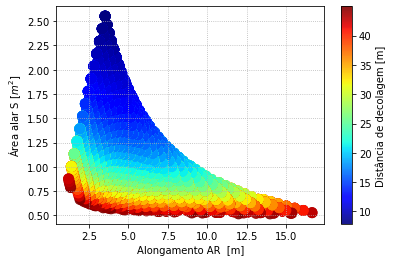

In [35]:
df = df2[(df2['Slo'] > 0) & (df2['Slo'] <= 45)]

#Muito bom
fig, ax = plt.subplots()

ax.set( xlabel=r'Alongamento AR  [m]', ylabel=r'Área alar S $[m^2]$')
e = ax.scatter(df.AR, df.S, marker='o', alpha=.9,  
                c=df.Slo, cmap='jet', s= 100)

cbar = plt.colorbar(e)
cbar.set_label('Distância de decolagem [m]')
ax.grid(ls='dotted')
#fig.savefig(f'MDO_AR.pdf', bbox_inches='tight')

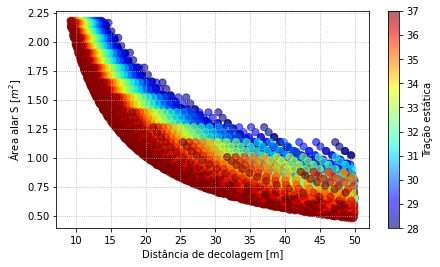

In [57]:
df = df2[(df2['Slo'] > 0) & (df2['Slo'] <= 50) & (df2['S'] <= 2.2)]

#Muito bom
fig, ax = plt.subplots(figsize=(7, 4))

ax.set( xlabel=r'Distância de decolagem [m]', ylabel=r'Área alar S $[m^2]$')
e = ax.scatter(df.Slo, df.S, marker='o', alpha=.6,  
                c=df.Tc_2, cmap='jet', s= 50, rasterized=True)

cbar = plt.colorbar(e)
cbar.set_label('Tração estática')
ax.grid(ls='dotted')
fig.savefig(f'MDO_tração.pdf', bbox_inches='tight', dpi=200)